<a href="https://colab.research.google.com/github/Udayan-Joshi/Internship-Projects/blob/main/Digit_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TITLE - Hand Written Digit Prediction - Classification Analysis**

**OBJECTIVE** - The digit dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image. **We have to identify or visualise the first four digit images.** The target attribute of the dataset stores the digit represented by each image.


In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Import data
from sklearn.datasets import load_digits

In [ ]:
df=load_digits()

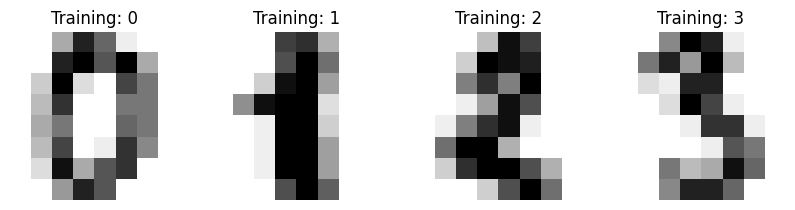

In [ ]:
_, axes= plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training: %i" % label)

Data Preprocessing

In [ ]:
df.images.shape

(1797, 8, 8)

In [ ]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
df.images[0].shape

(8, 8)

In [ ]:
len(df.images)

1797

In [ ]:
n_samples = len(df.images)
data=df.images.reshape((n_samples,-1))

In [ ]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data[0].shape

(64,)

In [ ]:
data.shape

(1797, 64)

Scaling image data

In [ ]:
data.min()

0.0

In [ ]:
data.max()

16.0

In [ ]:
data=data/16

In [ ]:
data.min()

0.0

In [ ]:
data.max()

1.0

In [ ]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

In [ ]:
#Train Test Split Data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,df.target,test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((1257, 64), (540, 64), (1257,), (540,))

In [ ]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train,y_train)

In [ ]:
#Predict test data
y_pred=rf.predict(x_test)
y_pred

array([3, 9, 0, 1, 4, 7, 3, 3, 2, 5, 8, 5, 9, 1, 6, 2, 5, 9, 6, 4, 5, 3,
       7, 8, 5, 0, 0, 4, 6, 1, 4, 8, 2, 2, 1, 4, 1, 8, 9, 4, 2, 6, 1, 5,
       5, 6, 5, 3, 7, 0, 7, 9, 7, 1, 3, 1, 2, 3, 3, 5, 7, 6, 3, 3, 9, 3,
       7, 3, 5, 1, 7, 9, 0, 1, 7, 5, 9, 6, 6, 7, 2, 0, 4, 2, 6, 5, 9, 5,
       6, 0, 1, 2, 0, 4, 2, 9, 2, 5, 8, 2, 4, 4, 8, 9, 3, 5, 7, 0, 6, 0,
       2, 2, 7, 9, 5, 5, 9, 1, 2, 8, 5, 6, 7, 4, 7, 0, 3, 0, 6, 2, 0, 9,
       8, 5, 3, 3, 2, 1, 6, 6, 2, 5, 7, 9, 2, 2, 8, 5, 1, 1, 5, 7, 0, 5,
       3, 9, 0, 1, 3, 1, 6, 7, 4, 5, 6, 9, 2, 8, 6, 6, 1, 4, 4, 8, 5, 4,
       0, 3, 8, 6, 7, 5, 3, 6, 0, 7, 4, 3, 4, 7, 0, 6, 2, 6, 9, 2, 0, 4,
       5, 8, 9, 1, 5, 0, 3, 3, 4, 8, 3, 4, 2, 8, 4, 7, 5, 6, 6, 2, 4, 6,
       1, 5, 5, 0, 2, 2, 0, 8, 1, 9, 4, 8, 2, 6, 9, 6, 9, 4, 4, 4, 6, 3,
       3, 4, 1, 3, 1, 5, 0, 0, 7, 2, 0, 2, 1, 7, 4, 9, 8, 8, 5, 7, 4, 7,
       2, 0, 1, 4, 0, 8, 8, 7, 4, 6, 3, 7, 1, 0, 7, 0, 9, 7, 8, 6, 2, 6,
       4, 6, 8, 8, 2, 2, 6, 1, 4, 9, 2, 0, 4, 4, 1,

In [ ]:
#Model Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9722222222222222

Explanation - The above model for digit prediction is 97.22% accurate. Hence, the problem is resolved and the model can be declared satisfactory because of its high accuracy score.